<h1>PCA Analysis</h1>

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [24]:
# load the dataset
df = pd.read_csv('../data/heart_disease_cleaned.csv')
df.head()
df.isnull().sum()

age            0
sex            0
trestbps       0
chol           0
fbs            0
thalach        0
exang          0
oldpeak        0
target         0
cp_2.0         0
cp_3.0         0
cp_4.0         0
restecg_1.0    0
restecg_2.0    0
slope_2.0      0
slope_3.0      0
thal_6.0       0
thal_7.0       0
dtype: int64

In [20]:
# seperate features and target variable
X = df.drop('target', axis=1)
y = df['target']

In [21]:
# standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [33]:
# explained variance ratio 
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()
print("Explained Variance Ratio:", explained_variance)
print("Cumulative Variance:", cumulative_variance)

Explained Variance Ratio: [0.17291548 0.10241826 0.08402028 0.08327181 0.07528375 0.06406992
 0.06099941 0.05322478 0.05182243 0.04583748 0.04166553 0.04021964
 0.03390042 0.03308489 0.0307053  0.02190093 0.0046597 ]
Cumulative Variance: [0.17291548 0.27533374 0.35935402 0.44262582 0.51790957 0.58197949
 0.64297889 0.69620367 0.7480261  0.79386358 0.83552911 0.87574875
 0.90964918 0.94273407 0.97343937 0.9953403  1.        ]


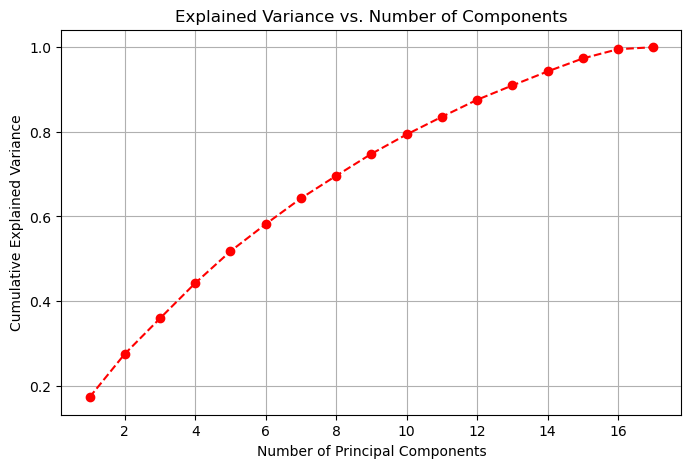

In [34]:
# Determine the optimal number of components
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), cumulative_variance, marker='o' ,color='r' , linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of Components")
plt.grid(True)
plt.show()

In [35]:
# reduce to 2 principal components for visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

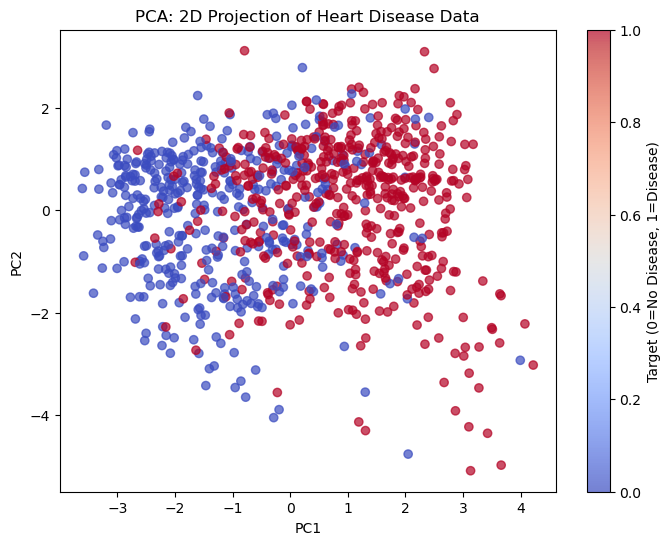

In [36]:
# visualize the PCA result
plt.figure(figsize=(8,6))
plt.scatter(X_pca_2d[:,0], X_pca_2d[:,1], c=y, cmap="coolwarm", alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA: 2D Projection of Heart Disease Data")
plt.colorbar(label="Target (0=No Disease, 1=Disease)")
plt.show()